# Inshore wave data for Narrabeen

_This notebook is a companion to your practical._

Since March 2016, an archive of inshore wave information has been made available, currently spanning the fixed period of 1979-2014 from the **Narrabeen-Collaroy Beach Survey Program**.

All data can be downloaded from the Narrabeen data repository: http://narrabeen.wrl.unsw.edu.au.

In [2]:
import requests
import io
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
from pylab import *

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline


## Loading the dataset


After following the instructuions in the practical, you will have already downloaded your profiles as a `.csv` files (comma-separated values).

:::{note}
`CSV` is a commonly used data format that opens easily in a range of software such as Notepad, Microsoft Excel, and obviously Python.
:::

The downloaded data can be visualised using `Pandas`. Here, I have extracted some of wave data in a file located in the `pracenv/dataset` folder:


In [3]:
dataframe = pd.read_csv('../pracenv/dataset/Inshore_Waves.csv', encoding="utf8")
dataframe

Profile ID Date and time (dd/mm/yyyy HH:MM AEST)  \
0              PF1                      15/01/1979 00:00   
1              PF1                      15/01/1979 01:00   
2              PF1                      15/01/1979 02:00   
3              PF1                      15/01/1979 03:00   
4              PF1                      15/01/1979 04:00   
...            ...                                   ...   
1566840        PF8                      14/10/2014 20:00   
1566841        PF8                      14/10/2014 21:00   
1566842        PF8                      14/10/2014 22:00   
1566843        PF8                      14/10/2014 23:00   
1566844        PF8                      15/10/2014 00:00   

         Significant wave height (m)  Peak wave period (s)  \
0                               1.32                  7.04   
1                               1.31                  7.14   
2                               1.30                  7.46   
3                               1.28                  7.69   
4                               1.25                  7.81   
...                              ...                   ...   
1566840                         1.13                 10.27   
1566841                         1.30                 10.83   
1566842                         1.62                 12.14   
1566843                         1.57                 11.45   
1566844                         1.87                 12.93   

         Direction (degrees TN)  Flag  
0                            84  HIND  
1                            85  HIND  
2                            86  HIND  
3                            87  HIND  
4                            87  HIND  
...                         ...   ...  
1566840                      94  MEAS  
1566841                      95  MEAS  
1566842                      93  MEAS  
1566843                      94  MEAS  
1566844                      92  MEAS  

[1566845 rows x 6 columns]


We will redefine the header to make it easier for the rest of the manipulation:

In [5]:
# Manually define names for each column
names = [
    "Profile",
    "date",
    "Hs",
    "Tp",
    "Dir",
    "Flag"
]

df = pd.read_csv('../pracenv/dataset/Inshore_Waves.csv', encoding="utf8", names=names, skiprows=1)
dates = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')

# Append a new column at the end of our iribarren values
df["time"] = dates
df

Profile              date    Hs     Tp  Dir  Flag                time
0           PF1  15/01/1979 00:00  1.32   7.04   84  HIND 1979-01-15 00:00:00
1           PF1  15/01/1979 01:00  1.31   7.14   85  HIND 1979-01-15 01:00:00
2           PF1  15/01/1979 02:00  1.30   7.46   86  HIND 1979-01-15 02:00:00
3           PF1  15/01/1979 03:00  1.28   7.69   87  HIND 1979-01-15 03:00:00
4           PF1  15/01/1979 04:00  1.25   7.81   87  HIND 1979-01-15 04:00:00
...         ...               ...   ...    ...  ...   ...                 ...
1566840     PF8  14/10/2014 20:00  1.13  10.27   94  MEAS 2014-10-14 20:00:00
1566841     PF8  14/10/2014 21:00  1.30  10.83   95  MEAS 2014-10-14 21:00:00
1566842     PF8  14/10/2014 22:00  1.62  12.14   93  MEAS 2014-10-14 22:00:00
1566843     PF8  14/10/2014 23:00  1.57  11.45   94  MEAS 2014-10-14 23:00:00
1566844     PF8  15/10/2014 00:00  1.87  12.93   92  MEAS 2014-10-15 00:00:00

[1566845 rows x 7 columns]

## Plotting significant wave height


We will now define a function that will take a specific profile ID `PID` and a start and end time and will plot the existing inshore wave data, showing significant wave height for the considered period...

In [6]:
def plotHsSeries(PID, start_date, end_date):
    '''
    This function plot the significant wave height for a specific transect based on specified period of time.
    
    args:
    - PID: transect ID
    - start_date: initial date requested in year-month-day
    - end_date: end date requested in year-month-day
    '''
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    for k in range(len(PID)):
        ids1 = np.where(df_time.Profile==PID[k])[0]
        ax1.plot(df_time['time'].iloc[ids1],df_time['Hs'].iloc[ids1],linewidth=1,label=PID[k]) 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('$H_s$ (m)')
    ax1.legend()
    
    plt.title('Narrabeen-Collaroy Wave Height from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

We now apply the function to 2 profiles. Here we chose the profile `PF1` and `PF8`:

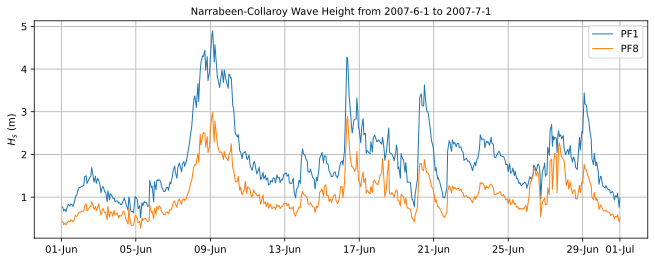

In [8]:
plotHsSeries(PID=['PF1','PF8'], start_date = '2007-6-1', end_date = '2007-7-1')

## Plotting significant wave period

Similarly we can plot the inshore wave data, showing peak wave period (Tp)...

In [9]:
def plotTpSeries(PID, start_date, end_date):
    '''
    This function plot the significant wave period for a specific transect based on specified period of time.
    
    args:
    - PID: transect ID
    - start_date: initial date requested in year-month-day
    - end_date: end date requested in year-month-day
    '''
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    ids1 = np.where(df_time.Profile==PID)[0]
    ax1.plot(df_time['time'].iloc[ids1],df_time['Tp'].iloc[ids1],linewidth=1,label=PID,color='k') 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('$T_p$ (s)')
    ax1.legend()
    plt.title('Narrabeen-Collaroy Wave Period from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

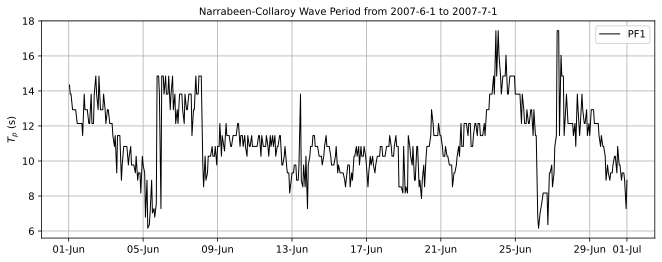

In [10]:
plotTpSeries(PID='PF1', start_date = '2007-6-1', end_date = '2007-7-1')

## Plotting wave direction

or the inshore wave data, showing wave direction...

In [11]:
def plotDirSeries(PID, start_date, end_date):
    '''
    This function plot the significant wave direction for a specific transect based on specified period of time.
    
    args:
    - PID: transect ID
    - start_date: initial date requested in year-month-day
    - end_date: end date requested in year-month-day
    '''
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    for k in range(len(PID)):
        ids1 = np.where(df_time.Profile==PID[k])[0]
        ax1.plot(df_time['time'].iloc[ids1],df_time['Dir'].iloc[ids1],'.',label=PID[k], markersize=2) 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('Dir ($^o$)')
    ax1.legend()
    plt.title('Narrabeen-Collaroy Wave Direction from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

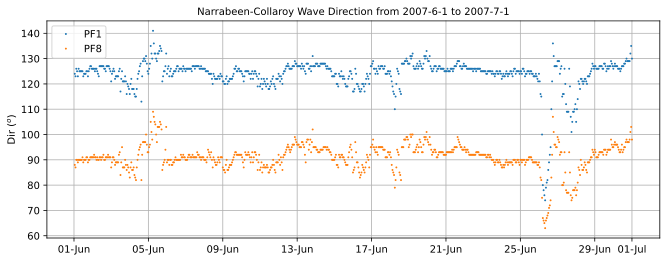

In [12]:
plotDirSeries(PID=['PF1','PF8'], start_date = '2007-6-1', end_date = '2007-7-1')